# **Loading Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('/content/drive/MyDrive/Final Project/credit_score_cleaned_train.csv')
data1

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,26.822620,265,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.944960,266,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,28.609352,267,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,31.377861,268,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,49.574947,...,4,Good,809.98,24.797346,269,No,41.420155,High_spent_Medium_value_payments,341.48923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88587,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,34.663570,378,No,60.971333,High_spent_Large_value_payments,479.86624,0
88588,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,40.565630,379,No,54.185950,High_spent_Medium_value_payments,496.65160,0
88589,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,41.255524,380,No,24.028477,High_spent_Large_value_payments,516.80910,0
88590,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.4158,35.104023,...,3,Good,502.38,33.638206,381,No,251.672580,Low_spent_Large_value_payments,319.16498,1


In [3]:
# To know about the count and the data type of each column

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88592 entries, 0 to 88591
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        88592 non-null  object 
 1   customer_id               88592 non-null  object 
 2   month                     88592 non-null  object 
 3   name                      88592 non-null  object 
 4   age                       88592 non-null  int64  
 5   ssn                       88592 non-null  object 
 6   occupation                88592 non-null  object 
 7   annual_income             88592 non-null  float64
 8   monthly_inhand_salary     88592 non-null  float64
 9   total_emi_per_month       88592 non-null  float64
 10  num_bank_accounts         88592 non-null  int64  
 11  num_credit_card           88592 non-null  int64  
 12  interest_rate             88592 non-null  int64  
 13  num_of_loan               88592 non-null  int64  
 14  type_o

From the above information, there are no empty values for any of the columns. non-null counts matches to total no.of records on the file.

In [4]:
# To show the no of rows and columns in a dataframe

data1.shape

(88592, 28)

# **Splitting data into train data and test data**

Column **credit_score** is our target column. The credit_score has values 0, 1 and 2 which represents credit rating- low, medium and high respectively.

Columns such as- **id, customer_id, month, name and ssn** do not govern credit_score so they have been dropped.

In [5]:
from sklearn.model_selection import train_test_split

X = data1.drop(['id','customer_id','month','name','ssn','credit_score'],axis=1)
Y = data1['credit_score']


traindataX, testdataX, traindataY, testdataY = train_test_split(X, Y, test_size=0.25)

traindataX.shape, testdataX.shape, traindataY.shape, testdataY.shape

((66444, 22), (22148, 22), (66444,), (22148,))

In [6]:
# To know statistics of each column including mean, median, standard deviation etc.

traindataX.describe()

,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,amount_invested_monthly,monthly_balance
count,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.00000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000
mean,32.941048,48897.641615,4066.415822,118.002521,5.533080,5.647162,15.217582,3.984122,22.00447,13.735838,10.737213,6.088089,1509.664091,32.170372,212.706565,637.990294,383.962922
std,10.649888,37489.352158,3121.396822,124.900633,2.584695,2.091304,8.869294,2.224655,15.24770,6.239578,6.913632,3.907170,1190.980968,5.075720,99.949434,2056.273887,197.268640
min,14.000000,7005.930000,303.645420,4.462838,0.000000,0.000000,1.000000,1.000000,-5.00000,0.000000,-6.490000,0.000000,0.230000,20.000000,1.000000,0.000000,0.007760
25%,24.000000,18798.830000,1577.332500,40.472250,4.000000,4.000000,8.000000,2.000000,10.00000,9.000000,5.610000,3.000000,599.170000,27.966345,134.000000,72.845388,264.804585
50%,33.000000,36080.590000,3018.168000,76.058270,6.000000,6.000000,15.000000,4.000000,19.00000,14.000000,9.670000,6.000000,1246.620000,32.165686,211.000000,132.045215,325.365905
75%,41.000000,69563.340000,5781.146500,161.163200,8.000000,7.000000,21.000000,6.000000,29.00000,19.000000,15.440000,9.000000,2139.330000,36.382270,291.000000,259.043875,446.528290
max,56.000000,179987.280000,15204.634000,1779.103300,11.000000,11.000000,34.000000,9.000000,67.00000,28.000000,36.970000,17.000000,4998.070000,49.564518,404.000000,10000.000000,1552.946000


# **Visualising Columns**

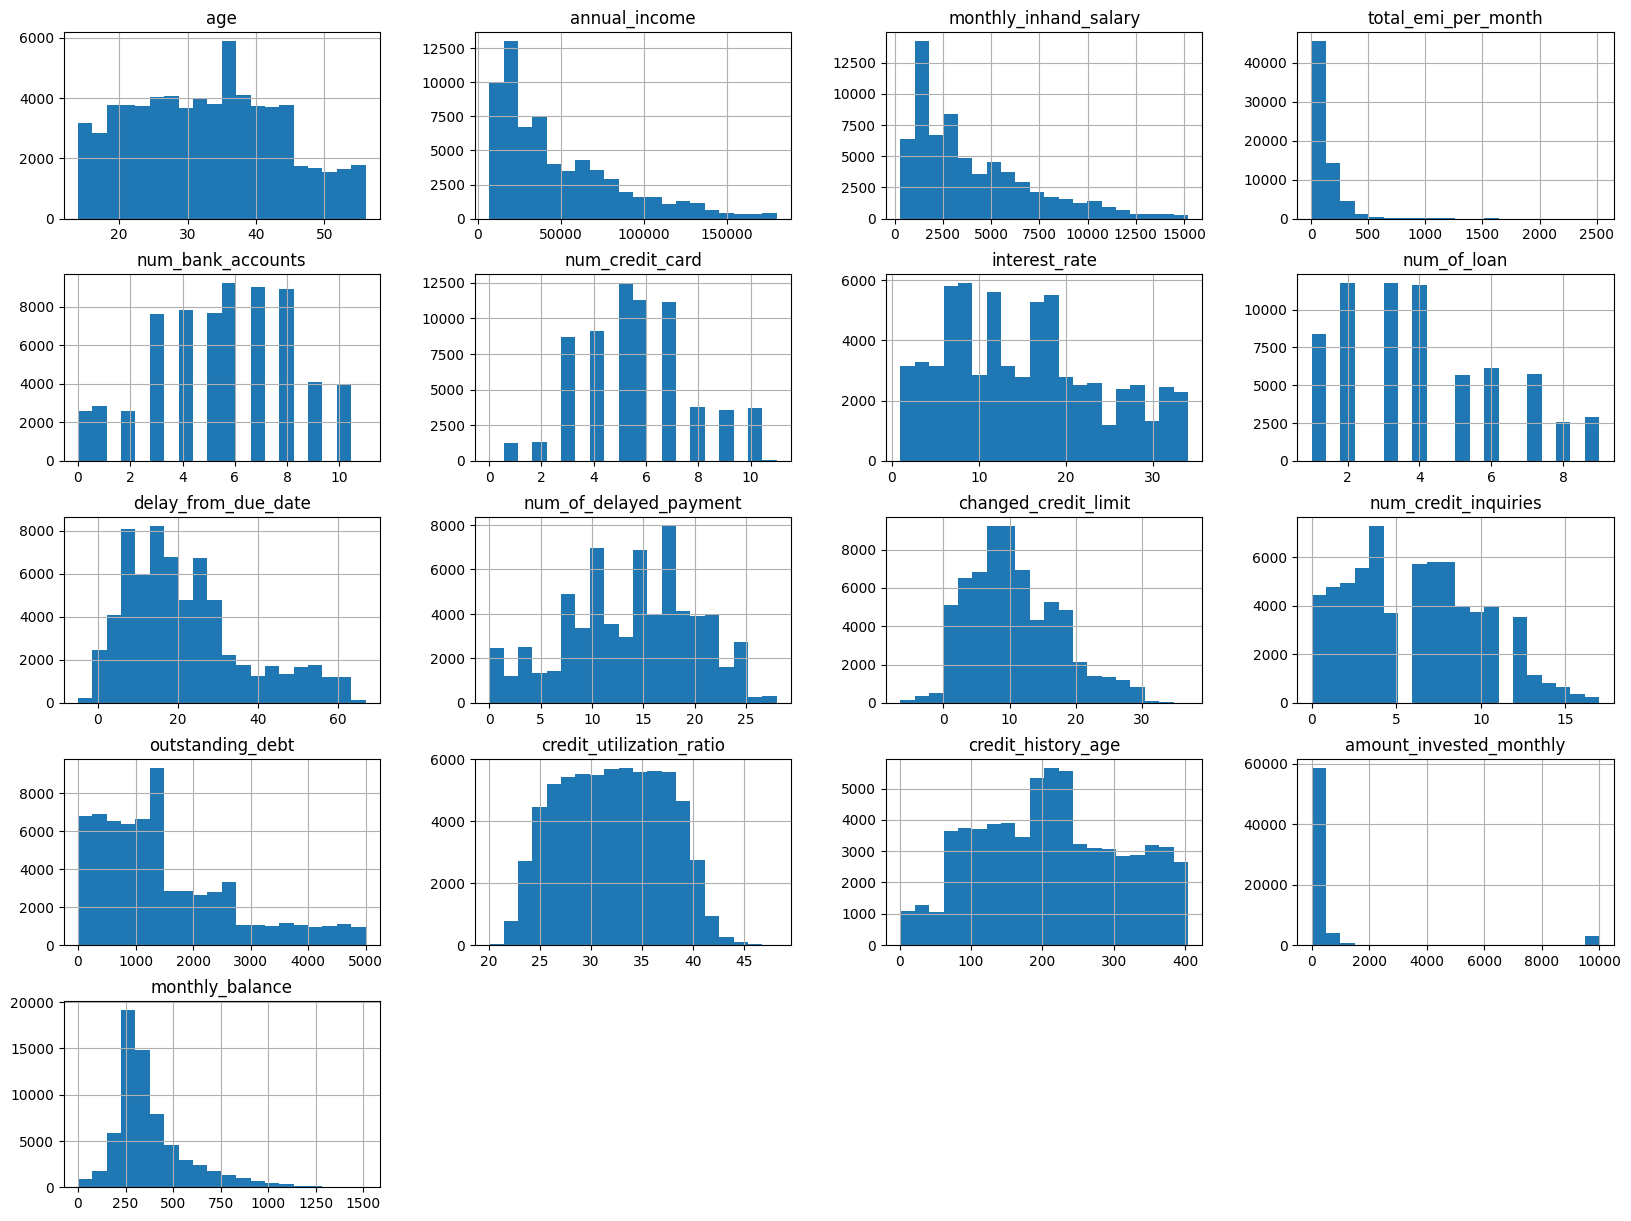

In [7]:
from matplotlib import pyplot as plt
traindataX.hist(bins=20, figsize=(20,15))
plt.show()

In the above histograms we see some of the data is skewed and couple of them are symmetrical like acceleration and model year

**Finding numerical columns from traindataX**

In [ ]:
num_cols = [column for column in traindataX.columns if (traindataX[column].dtypes == np.int64) or (traindataX[column].dtypes == np.float64)]
num_cols

['age',
 'annual_income',
 'monthly_inhand_salary',
 'total_emi_per_month',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'num_credit_inquiries',
 'outstanding_debt',
 'credit_utilization_ratio',
 'credit_history_age',
 'amount_invested_monthly',
 'monthly_balance']

**Finding categorical data from traindataX**

In [ ]:
cat_cols = [column for column in traindataX.columns if traindataX[column].dtypes == object]
cat_cols

['occupation',
 'type_of_loan',
 'credit_mix',
 'payment_of_min_amount',
 'payment_behaviour']

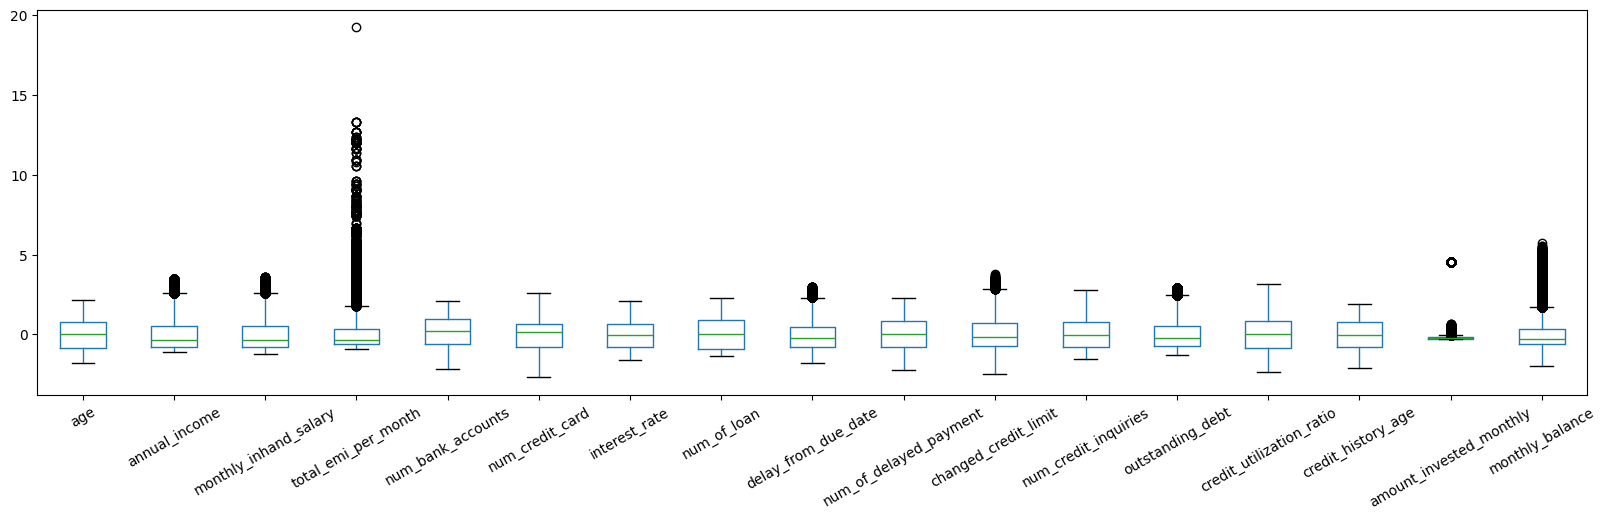

In [ ]:
# Drawing box plot for all numerical columns

new = (traindataX[num_cols] - traindataX[num_cols].mean()) / traindataX[num_cols].std() # standardizes data around 0 and 1
new.boxplot(grid=False, figsize=(20,5), rot=30) # boxplot the columns
plt.show()

Through box plot, it is seen that total_emi_per_month and amount_invested_monthly have some outliers. We have to determine whether these outliers are due to errors or presence of any unusual case.


In [ ]:
tepm = data1['total_emi_per_month']

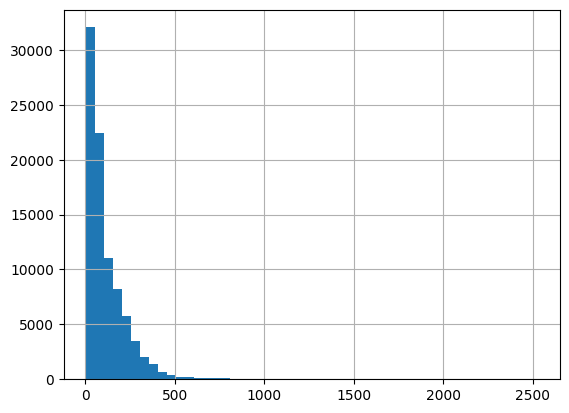

In [ ]:
tepm.hist(bins=50)
plt.show()

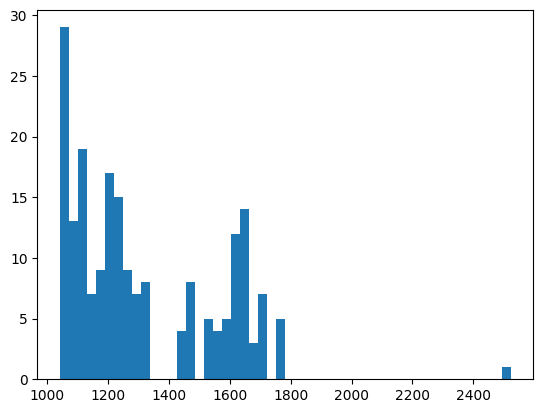

In [ ]:
# Lets check the distribution for people having tepm > 1000

plt.hist(tepm[tepm>1000], bins=50)
plt.show()

In [ ]:
# Lets check for people having tepm>2000

tepm[tepm>2000]

# Since there are only 2 people having tepm greater than 2000 hence theres no coded value
# This column is just skewed it has to undergo log transformation

,total_emi_per_month
53496,2523.0


In [ ]:
aim = data1['amount_invested_monthly']

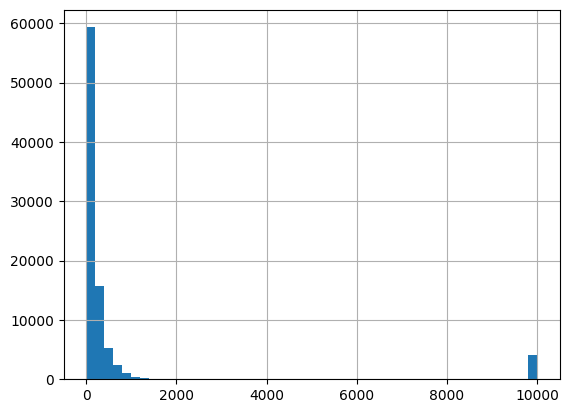

In [ ]:
aim.hist(bins=50)
plt.show()

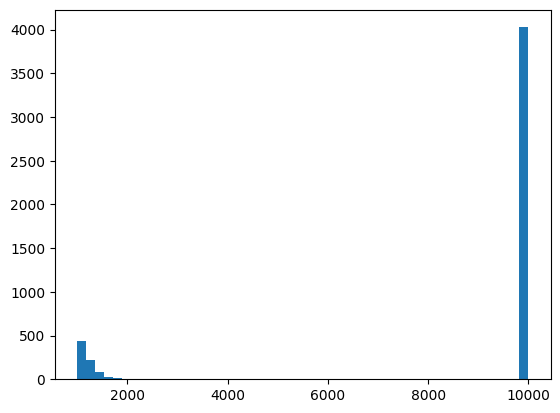

In [ ]:
# Lets check the distribution for people having aim > 1000

plt.hist(aim[aim>1000], bins=50)
plt.show()

In [ ]:
# Lets check for count of people having aim = 10000

aim[aim ==10000].value_counts()

,count
amount_invested_monthly,
10000.0,4026


Now repeating the above steps for the target column

In [ ]:
traindataY.describe()

,credit_score
count,66444.000000
mean,0.848369
std,0.671291
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


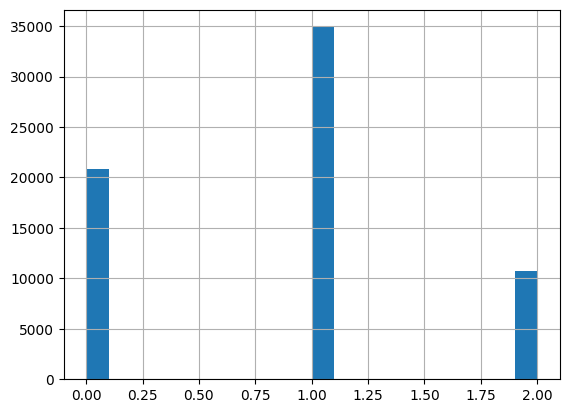

In [ ]:
traindataY.hist(bins=20)
plt.show()

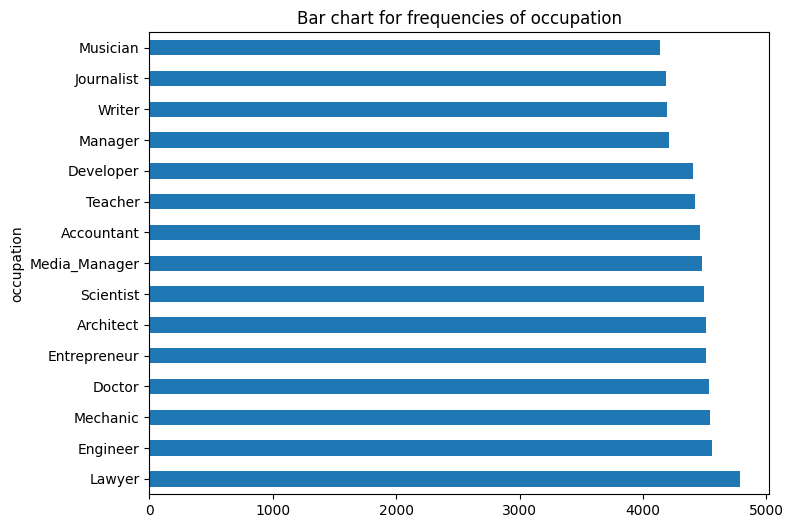


Showing top 50 categories for type_of_loan. There are more.


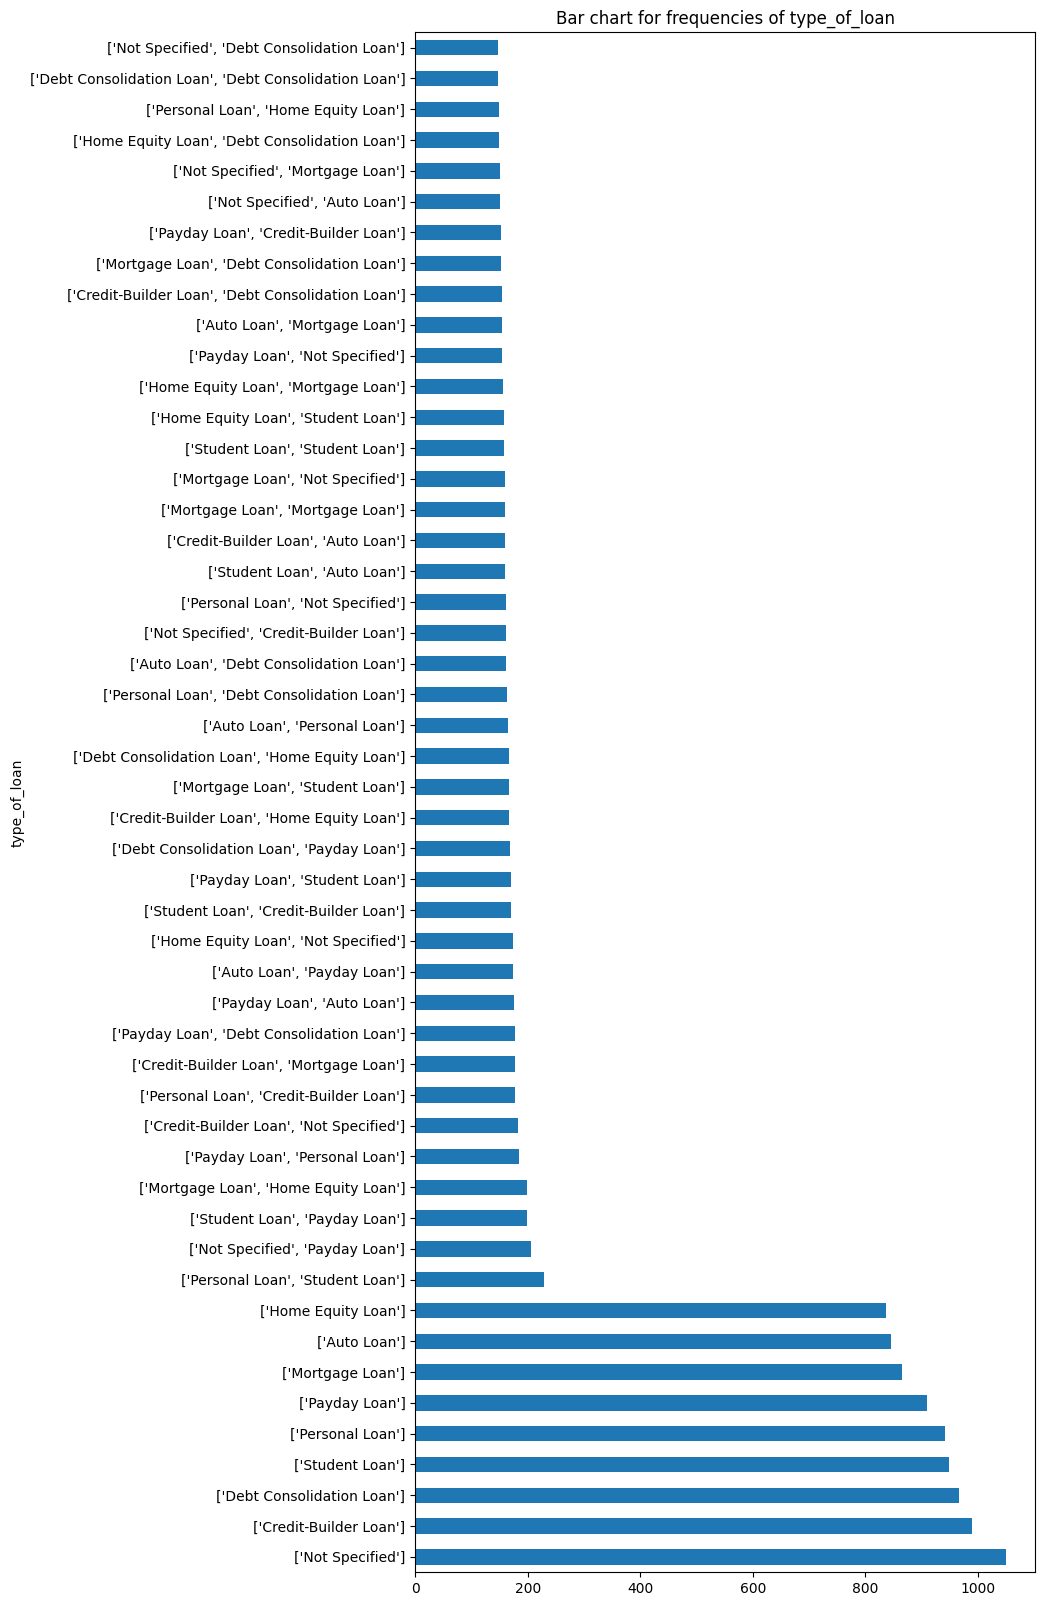

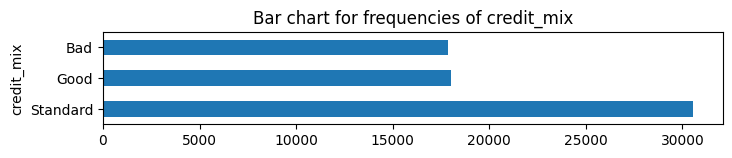

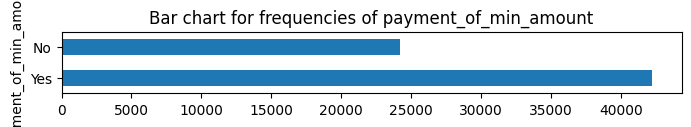

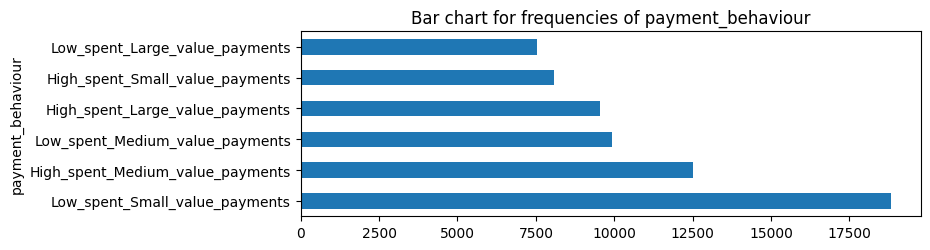

In [ ]:
for col in cat_cols:
    freq_table = traindataX[col].value_counts()
    if len(freq_table) > 50:  # Adjust 50 as needed
        freq_table = freq_table[:50]  # Consider displaying top categories instead of all
        print(f"Showing top 50 categories for {col}. There are more.")
    plt.figure(figsize = (8,len(freq_table)*0.4)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

**Categorizing the columns**

In [8]:
# As seen from histogram the below columns had normal distribution so they have been categorized into num_cols
num_cols = ['age', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'num_of_delayed_payment', 'changed_credit_limit', 'credit_utilization_ratio', 'credit_history_age']

# The following columns were skewed as seen from histogram, hence they have to undergo log transformation, they have been classified into log_cols
log_cols = ['annual_income', 'monthly_inhand_salary', 'total_emi_per_month', 'delay_from_due_date','num_credit_inquiries','outstanding_debt','amount_invested_monthly', 'monthly_balance']

# The following columns had data type as object hence are categorized under cat_cols
cat_cols = ['occupation', 'type_of_loan', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']

# The below is the target column
target = ['credit_score']

# **Data Preprocessing**

In [9]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(transform_output="pandas")


def remove_0(X):                    #This block of code checks out for '0' value and replace it with 'NaN'
    # Ensure all columns exist in X before accessing them
     for col in num_cols:
        if col in X.columns:
            X.loc[X[col]==0, col] = np.nan
        return X


num_pipeline = Pipeline([
    ('remove 0', FunctionTransformer(remove_0, validate=False)),
    ('impute', SimpleImputer(strategy='median')),                                     #this step will impute missing values using column medians
    ('standardize', StandardScaler())                                                 #this step will scale all numeric columns
])

def log_transformation(x):
    x_clipped = np.clip(x, a_min=1e-8, a_max=None)
    return np.log(x_clipped)


def remove_0_log(X):                     #This block of code checks out for '0' value and replace it with 'NaN'
    # Ensure all columns exist in X before accessing them
       for col in log_cols:
        if col in X.columns:
            X.loc[X[col]==0, col] = np.nan
        return X

log_pipeline = Pipeline([
     ('remove 0 log', FunctionTransformer(remove_0_log, validate=False)),
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

# **RandomForest Modeling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score # Import make_scorer

rfc = Pipeline([
    ('processing', processing_pipeline),
    ('rfc', RandomForestClassifier(n_estimators=25, max_depth=4))
])

data_size = traindataX.shape[0]
n_features = processing_pipeline.fit_transform(traindataX).shape[1]

param_grid = {
    'rfc__n_estimators': [50, 100, 200],  # Wider range of estimators
    'rfc__max_depth': [5, 10, 15, None],  # Include None for unlimited depth
    'rfc__min_samples_split': [2, 5, 10],
    'rfc__min_samples_leaf': [1, 2, 4],
    'rfc__max_features': ['sqrt', 'log2', None], # Different options for max_features
    'rfc__max_leaf_nodes': [None, 20, 40, 60], # Wider range
    # ... add other potentially relevant hyperparameters ...
}

# Create a scorer with the desired averaging method
f1_scorer = make_scorer(f1_score, average='weighted') # Or 'micro' or 'macro'

grid_search = RandomizedSearchCV(
    rfc,
    param_grid,
    cv=5,  # Potentially reduce cv
    scoring=f1_scorer,
    return_train_score=True,
    error_score='raise',
    n_iter=30,  # Potentially reduce n_iter
    n_jobs=-1   # Use all available CPU cores
)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
grid_search.fit(traindataX, traindataY)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8039567484864729
{'rfc__n_estimators': 100, 'rfc__min_samples_split': 5, 'rfc__min_samples_leaf': 1, 'rfc__max_leaf_nodes': None, 'rfc__max_features': 'sqrt', 'rfc__max_depth': None}


In [ ]:
grid_search.best_score_

0.8039567484864729

In [ ]:
grid_search.score(testdataX, testdataY)

0.8154878884675498

# **K_Nearest_Neighbor Modeling**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data2 = pd.read_csv('/content/drive/MyDrive/Final Project/credit_score_cleaned_train.csv', nrows=10000)  # considering small dataset from file inorder to avoid the crash because of RAM usage
data2

data2.shape

(10000, 28)

In [15]:
X1 = data2.drop(['id','customer_id','month','name','ssn','credit_score'],axis=1)
Y1 = data2['credit_score']

In [16]:
traindataX1, testdataX1, traindataY1, testdataY1 = train_test_split(X1, Y1, test_size=0.25)

traindataX1.shape, testdataX1.shape, traindataY1.shape, testdataY1.shape

((7500, 22), (2500, 22), (7500,), (2500,))

In [17]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(transform_output="pandas")


def remove_0(X):            #This block of code checks out for '0' value and replace it with 'NaN'
  # Iterate directly through column names in num_cols
    for col in num_cols:
        if col in X.columns:
            X.loc[X[col]==0, col] = np.nan
    return X


num_pipeline = Pipeline([
    ('remove 0', FunctionTransformer(remove_0, validate=False)),
    ('impute', KNNImputer()),                                     #this step will impute missing values using column medians
    ('standardize', StandardScaler())                                                 #this step will scale all numeric columns
])

def log_transformation(x):                                         #This function takes numerical data, makes sure there are no values too close to zero (by clipping them), and then applies a logarithmic transformation.
    x_clipped = np.clip(x, a_min=1e-8, a_max=None)
    return np.log(x_clipped)


def remove_0_log(X):                       #This block of code checks out for '0' value and replace it with 'NaN'
   # Iterate directly through column names in log_cols
    for col in log_cols:
        if col in X.columns:
            X.loc[X[col]==0, col] = np.nan
    return X

log_pipeline = Pipeline([
     ('remove 0 log', FunctionTransformer(remove_0_log, validate=False)),
    ('impute', KNNImputer(weights='distance')),                #this step will impute missing values
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

num_cols = ['age', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'num_of_delayed_payment', 'changed_credit_limit', 'credit_utilization_ratio', 'credit_history_age']
log_cols = ['annual_income', 'monthly_inhand_salary', 'total_emi_per_month', 'delay_from_due_date','num_credit_inquiries','outstanding_debt','amount_invested_monthly', 'monthly_balance']
cat_cols = ['occupation', 'type_of_loan', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']



processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
                                                                                                # sparse=False to avoid the error.
  ])

In [32]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


knn_pipeline = Pipeline([
   ('processing', processing_pipeline),
    ('knn', KNeighborsClassifier())
])

param_grid = [{
 'knn__weights' : ['uniform', 'distance'],
 'knn__n_neighbors' : [3, 5, 10, 20, 50]
}]

grid_search_knn = GridSearchCV(knn_pipeline, param_grid, cv=5) # cv=5 for 5-fold cross-validation

grid_search_knn.fit(traindataX1, traindataY1)  # Fit the GridSearchCV object
knn_pipeline = grid_search_knn.best_estimator_  # Use the best estimator from grid search

print(grid_search_knn.best_score_)  # Access best_score_ from GridSearchCV


0.7738666666666666


In [33]:
knn_pipeline.predict(testdataX1)

array([2, 1, 1, ..., 1, 2, 1])

In [34]:
accuracy = knn_pipeline.score(testdataX1, testdataY1)
print("Accuracy:", accuracy)

Accuracy: 0.7728
